# Import libraries

In [487]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Importing data and understanding it

In [488]:
df = pd.read_csv('/content/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [490]:
df.shape

(1067, 13)

In [491]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']].describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [492]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


# Analysing visualizations

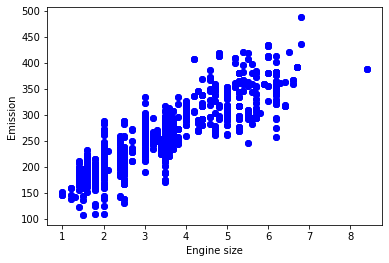

In [493]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

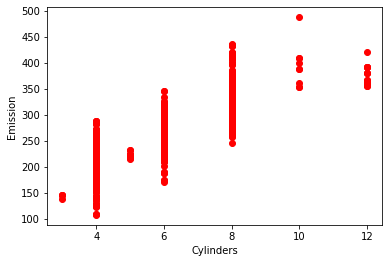

In [494]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

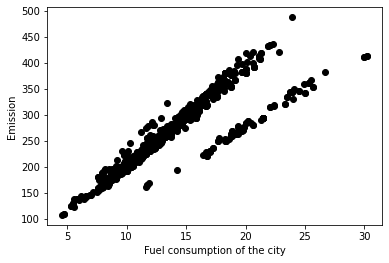

In [495]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='black')
plt.xlabel("Fuel consumption of the city")
plt.ylabel("Emission")
plt.show()

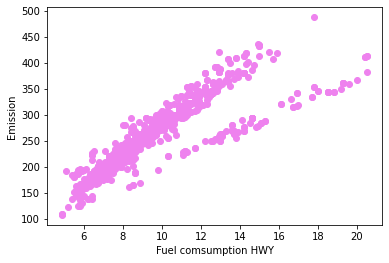

In [496]:
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS,  color='violet')
plt.xlabel("Fuel comsumption HWY")
plt.ylabel("Emission")
plt.show()

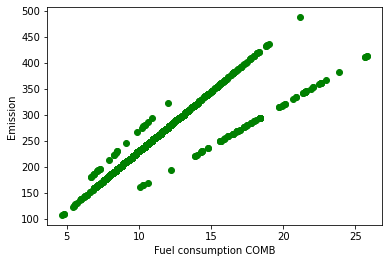

In [497]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Fuel consumption COMB")
plt.ylabel("Emission")
plt.show()

# Simple regression model

In [498]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [499]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [500]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [501]:
regr.fit (train_x, train_y)

LinearRegression()

In [502]:
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.14359658 10.77259619  7.95262996]]


In [503]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [504]:
y_hat= regr.predict(test_x)

In [505]:
print("Residual sum of squares: %.2f" % np.mean((y_hat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))

Residual sum of squares: 535.31
Variance score: 0.88
